
# Junior Data Scientist – Trader Behavior Insights
Jashanpreet Singh

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load datafiles

In [ ]:
df_greed = pd.read_csv('fear_greed_index.csv')
df_history = pd.read_csv('historical_data.csv')
#Path is set like this because I used google colab for working and data files are in the same folder
#Will include another path as a comment once I finalise the code

#df_greed = pd.read_csv('csv_files/fear_greed_index.csv')
#df_history = pd.read_csv('csv_files/historical_data.csv')


#Use the above path if working in VS Code 

Understand the data

In [ ]:
print("Fear Greed Data Shape:", df_greed.shape)

Fear Greed Data Shape: (2644, 4)


In [ ]:
df_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:
df_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
print("Historical Data Shape ",df_history.shape)

Historical Data Shape  (211224, 16)


In [ ]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
df_history.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
#Check duplicate data
sum(df_greed.duplicated())

0

In [ ]:
sum(df_history.duplicated())

0

Data Cleaning

In [ ]:
#Extract Date & Time from History dataset
df_history['DateTime']  = pd.to_datetime(df_history['Timestamp IST'], dayfirst=True)

df_history['Date'] = df_history['DateTime'].dt.date
df_history['Time'] = df_history['DateTime'].dt.time

Data Aggregation to Make it similar to Sentiment data for further Analysis

In [ ]:
df_daily = df_history.groupby('Date').agg(
    Closed_PnL = ('Closed PnL', 'mean'),
    Size_USD = ('Size USD', 'sum'),
    Size_Token = ('Size Tokens', 'sum'),
    Execution_Price = ('Execution Price', 'mean'),
    Fee = ('Fee', 'sum'),
    Start_Position_Mean = ('Start Position', 'mean'),
        Start_Position_STD = ('Start Position', 'std')
).reset_index()

#Adding directions as well
#Standardize Direction column
df_history['Direction'] = (df_history['Direction'].str.strip().str.capitalize().astype('category'))


#Get counts of Buy/Sell per Day
daily = df_history.groupby(['Date', 'Direction']).size().unstack(fill_value=0).reset_index()

#Merge with df_daily
df_daily = df_daily.merge(daily, on = 'Date')

#Adding Bullish Ratio {I tried doing Long/Short Ratio, that was giving NaN's as at some place both Buy and Sell Values are 0}

bullish_cols = ['Buy', 'Open long', 'Close short']
bearish_cols = ['Sell', 'Open short', 'Close long']

df_daily['Bullish'] = df_daily[bullish_cols].sum(axis = 1)
df_daily['Bearish'] = df_daily[bearish_cols].sum(axis = 1)

#Ratio

df_daily['Bullish Ratio'] = df_daily['Bullish'] / (df_daily['Bullish'] + df_daily['Bearish'])

/tmp/ipython-input-1421193674.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily = df_history.groupby(['Date', 'Direction']).size().unstack(fill_value=0).reset_index()


In [ ]:
#Check null values in new table
df_daily.isna().sum()

,0
Date,0
Closed_PnL,0
Size_USD,0
Size_Token,0
Execution_Price,0
Fee,0
Start_Position_Mean,0
Start_Position_STD,6
Auto-deleveraging,0
Buy,0


In [ ]:
#6 Null Values in STD Column
df_daily['Start_Position_STD'] = df_daily['Start_Position_STD'].fillna(0)

#Dropping 4 null Bullish Ratio as they might change the final results
df_daily = df_daily.dropna()

In [ ]:
#Final daily trader dataset with required columns and cleaned data
df_daily.shape

(476, 23)

Now we have daily trader behaviour, so I'm going to merge it with the sentimnet data to further proceed with the EDA.

In [ ]:
#Standardize Sentiment dates
df_greed['date'] = pd.to_datetime(df_greed['date']).dt.normalize()

#Standardize Daily Trader dates
df_daily['Date'] = pd.to_datetime(df_daily['Date']).dt.normalize()

In [ ]:
#Merge the data now

df = df_greed.merge(df_daily, left_on = 'date', right_on = 'Date', how = 'inner')

print("Final Dataset Shape:", df.shape)

Final Dataset Shape: (475, 27)


In [ ]:
df.head()

,timestamp,value,classification,date,Date,Closed_PnL,Size_USD,Size_Token,Execution_Price,Fee,...,Long > short,Open long,Open short,Sell,Settlement,Short > long,Spot dust conversion,Bullish,Bearish,Bullish Ratio
0,1682919000,63,Greed,2023-05-01,2023-05-01,0.000000,477.00,0.25130,1898.133333,0.000000,...,0,3,0,0,0,0,0,3,0,1.000000
1,1701754200,75,Extreme Greed,2023-12-05,2023-12-05,0.000000,50005.83,11.80901,11038.300000,12.501455,...,0,7,2,0,0,0,0,7,2,0.777778
2,1702531800,72,Greed,2023-12-14,2023-12-14,-18.675885,113203.35,4092.28901,8031.868818,28.300831,...,0,3,2,0,0,0,0,5,6,0.454545
3,1702618200,70,Greed,2023-12-15,2023-12-15,-12.316017,10609.95,3558.00000,2.982000,2.652489,...,0,0,0,0,0,0,0,2,0,1.000000
4,1702704600,67,Greed,2023-12-16,2023-12-16,0.000000,15348.77,39897.00000,0.384707,3.837189,...,0,3,0,0,0,0,0,3,0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  475 non-null    int64         
 1   value                      475 non-null    int64         
 2   classification             475 non-null    object        
 3   date                       475 non-null    datetime64[ns]
 4   Date                       475 non-null    datetime64[ns]
 5   Closed_PnL                 475 non-null    float64       
 6   Size_USD                   475 non-null    float64       
 7   Size_Token                 475 non-null    float64       
 8   Execution_Price            475 non-null    float64       
 9   Fee                        475 non-null    float64       
 10  Start_Position_Mean        475 non-null    float64       
 11  Start_Position_STD         475 non-null    float64       
 12  Auto-del

In [ ]:
#We have 2 date columns so I'll drop one

df = df.drop(columns = ['date'])

In [ ]:
#Check columns which contains lots of 0's
(df_daily == 0).sum().sort_values(ascending=False).head(10)

,0
Settlement,475
Liquidated isolated short,475
Auto-deleveraging,475
Long > short,436
Short > long,430
Spot dust conversion,412
Sell,287
Buy,263
Close short,149
Open short,127


In [ ]:
#We can see that top 6 columns have more than 85% of 0's as their value so we don't need them and can drop them
df = df.drop(columns = ['Settlement', 'Liquidated isolated short',
                        'Auto-deleveraging', 'Long > short', 'Short > long'])


Visual Data Analysis and Trends

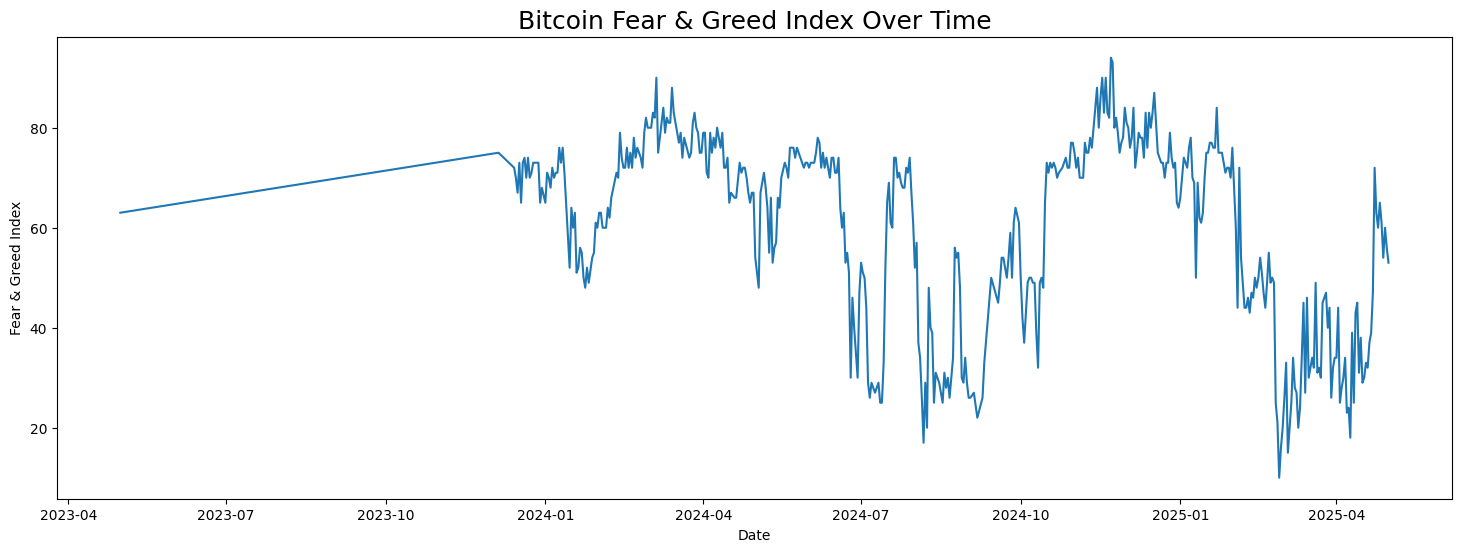

In [ ]:
#Fear vs Greed Over Time
plt.figure(figsize = (18,6))
plt.plot(df['Date'], df['value'])
plt.title('Bitcoin Fear & Greed Index Over Time', fontsize = 18)
plt.xlabel('Date')
plt.ylabel('Fear & Greed Index')
plt.show()

The Fear & Greed index fluctuates sharply over time, which strongly reflects the nature of crypto markets. There can be seen an extened period of greed followed by certain drops into Fear, reflecting how strongly trader sentiments reacts to violatility & external shocks.

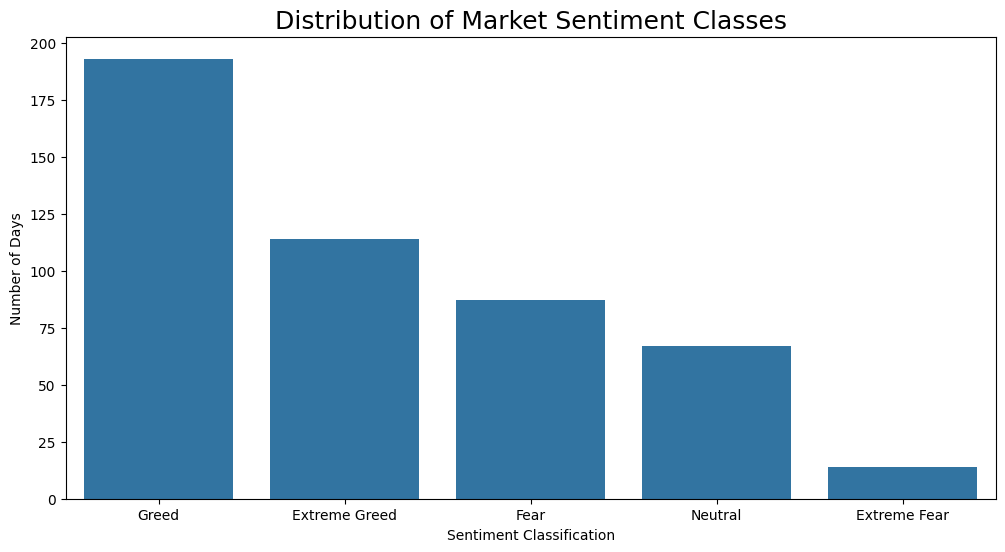

In [ ]:
#Sentiment Class Distribution
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'classification', order = df['classification'].value_counts().index)
plt.title('Distribution of Market Sentiment Classes', fontsize = 18)
plt.xlabel('Sentiment Classification')
plt.ylabel("Number of Days")
plt.show()

The market spends most days in Greed or Extreme Greed while Extreme Fear is very rare. This suggests traders face extended bullish periods with some fear episodes.

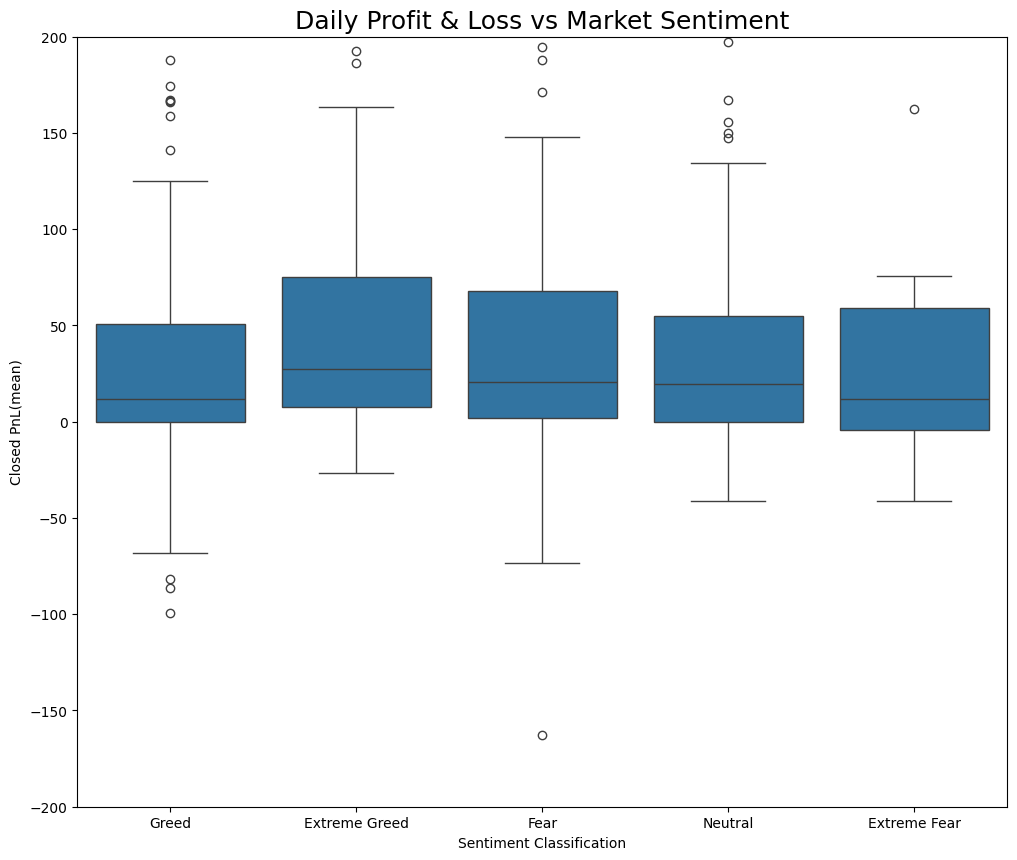

In [ ]:
#Closed PnL vs Sentiment Classification
plt.figure(figsize = (12,10))
sns.boxplot(data = df, x = 'classification', y='Closed_PnL', order = df['classification'].value_counts().index)
plt.ylim(-200,200)
plt.title('Daily Profit & Loss vs Market Sentiment', fontsize = 18)
plt.xlabel('Sentiment Classification')
plt.ylabel("Closed PnL(mean)")
plt.show()

PnL distribution shows a higher variance during Fear/Extreme Fear, which means unstable performance while Greed shows more consistency but smaller returns.

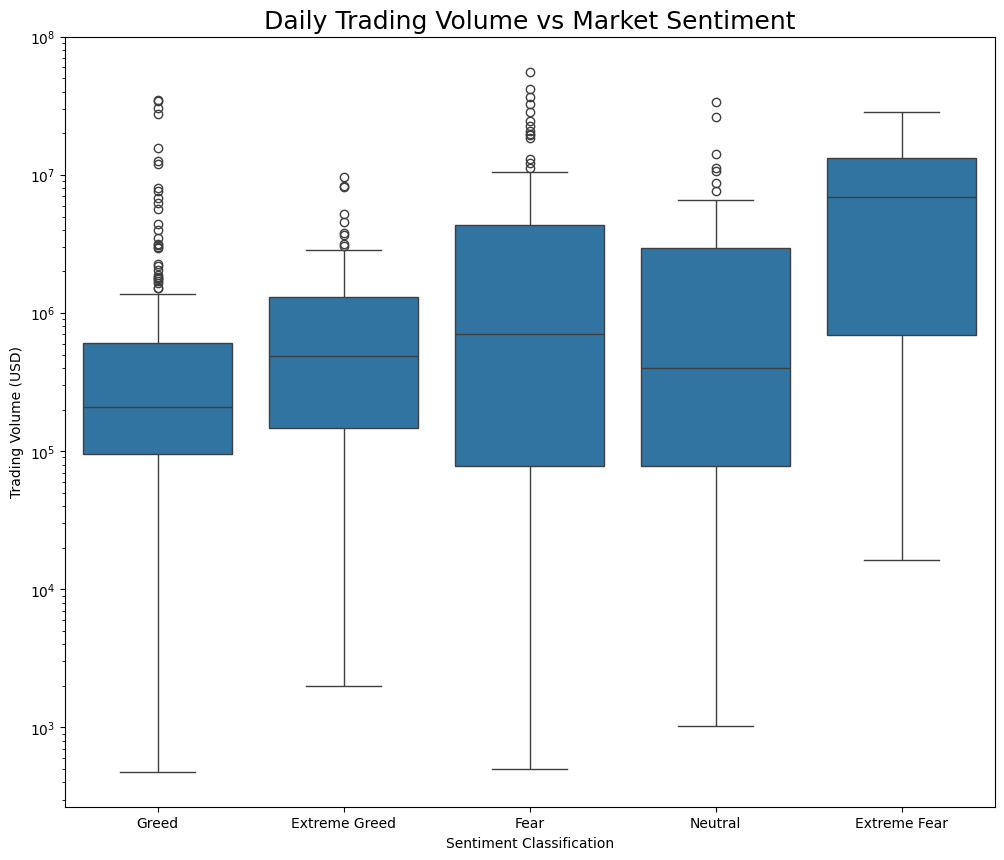

In [ ]:
#Trading Volume vs Sentiment
plt.figure(figsize = (12,10))
sns.boxplot(data = df, x = 'classification', y='Size_USD', order = df['classification'].value_counts().index)
plt.yscale('log')
plt.title('Daily Trading Volume vs Market Sentiment', fontsize = 18)
plt.xlabel('Sentiment Classification')
plt.ylabel("Trading Volume (USD)")
plt.show()

Trading volume spikes sharply in Fear & Extreme Fear which shows panic trading or forced liquidations while Greed phases see relatively lower but stable volumes.

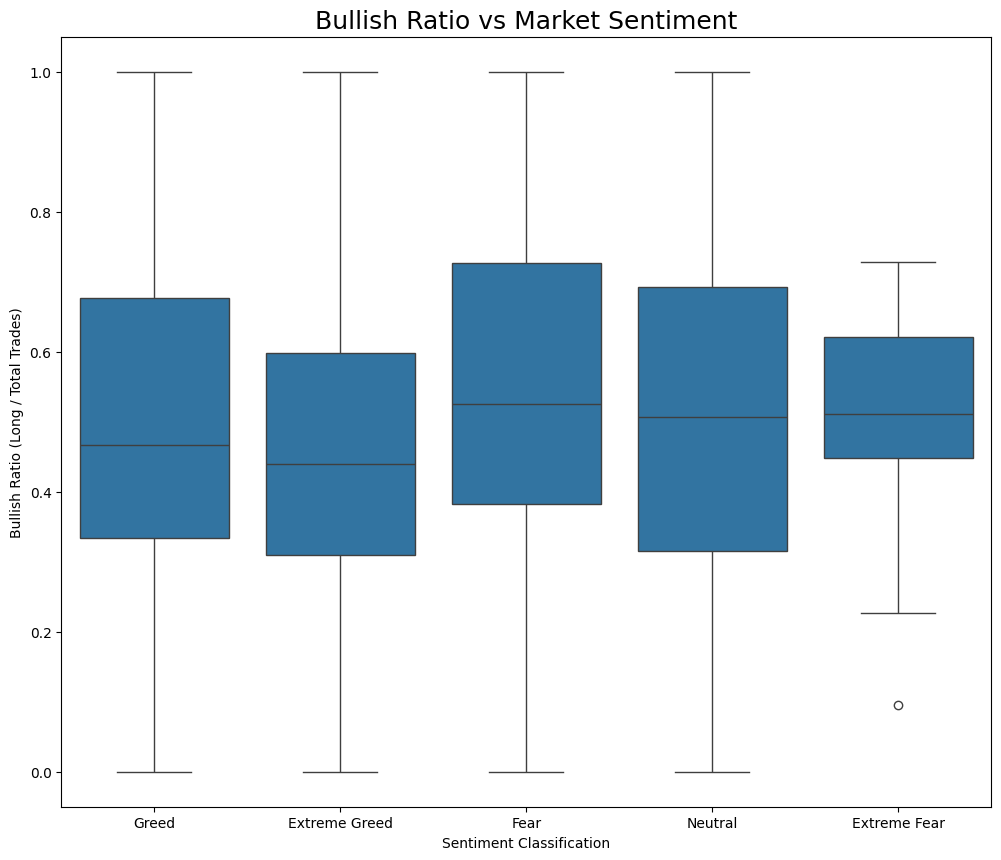

In [ ]:
#Bullish Ratio vs Sentiment
plt.figure(figsize = (12,10))
sns.boxplot(data = df, x = 'classification', y='Bullish Ratio', order = df['classification'].value_counts().index)
plt.title('Bullish Ratio vs Market Sentiment', fontsize = 18)
plt.xlabel('Sentiment Classification')
plt.ylabel("Bullish Ratio (Long / Total Trades)")
plt.show()

Crypto traders lean bullish during Extreme Good while Fear pushes positioning towards bearishness. In case of Extreme Fear, there is high dispersion which shows market uncertanity.

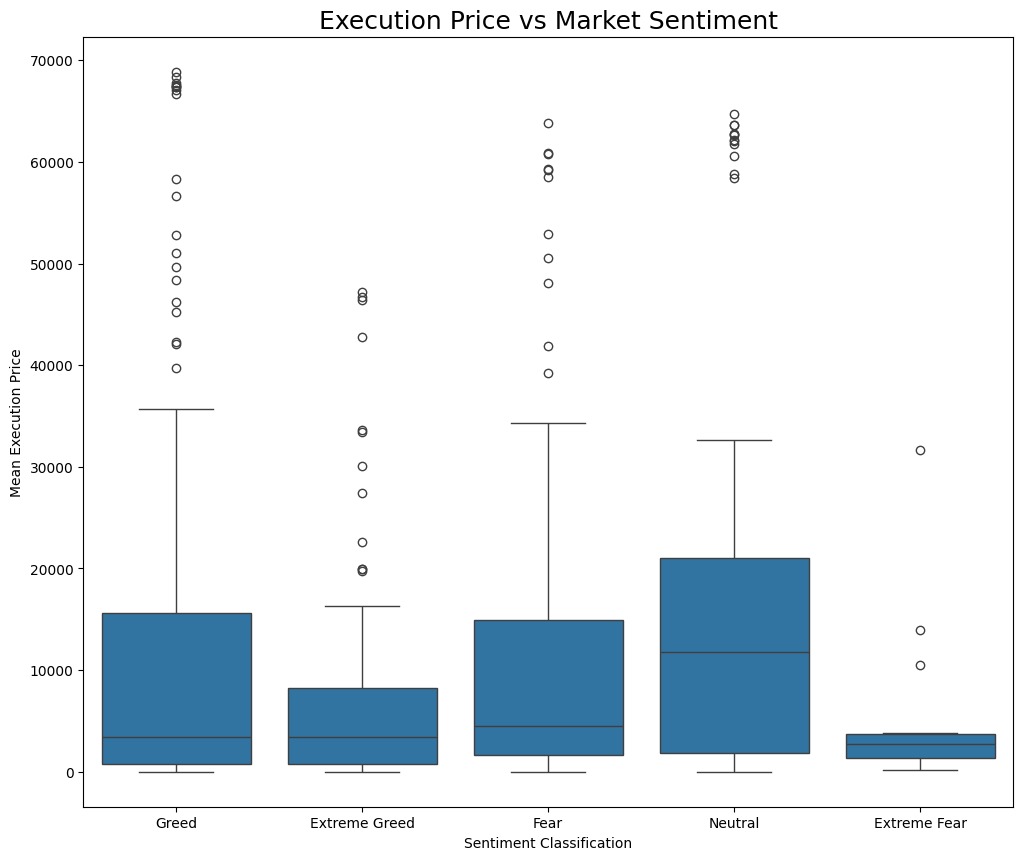

In [ ]:
#Execution Price vs Sentiment
plt.figure(figsize = (12,10))
sns.boxplot(data = df, x = 'classification', y='Execution_Price', order = df['classification'].value_counts().index)
plt.title('Execution Price vs Market Sentiment', fontsize = 18)
plt.xlabel('Sentiment Classification')
plt.ylabel("Mean Execution Price")
plt.show()

Execution prices cluster higher during Greed/Neutral, however wider spreads can be seen in Fear/Extreme Fear periods, meaning increased volatility.

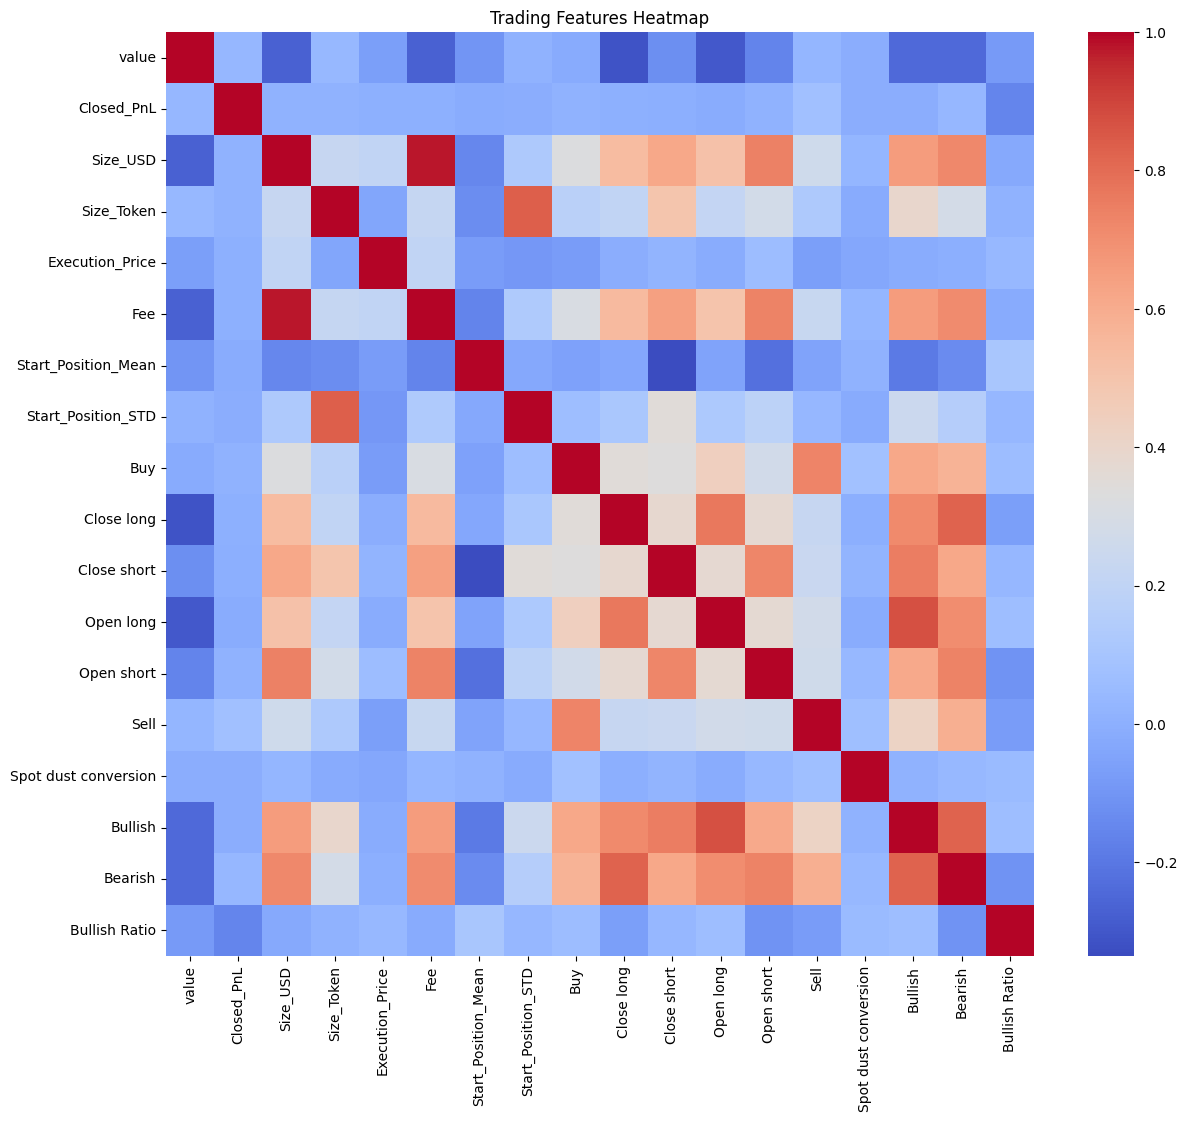

In [ ]:
#Correlation Heatmap

plt.figure(figsize=(14,12))
sns.heatmap(df.drop(columns=['timestamp', 'Date', 'classification']).corr(), cmap = 'coolwarm')
plt.title("Trading Features Heatmap")
plt.show()

Strong Correlation exists between trading size, fees & PnL which confirms that trades comes with risks. Bullish/Bearish counts are inversely related which also validates the long/short positioning metric.